<a href="https://colab.research.google.com/github/UmaGhildiyal/Earthquake_Prediction/blob/main/Live_Earthquake_Plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting Earthquakes in past 24 hours

Link for downloading dataset

http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/1.0_week.csv

In [5]:
# importing libraries
!pip install cartopy

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 30.8 MB/s eta 0:00:00


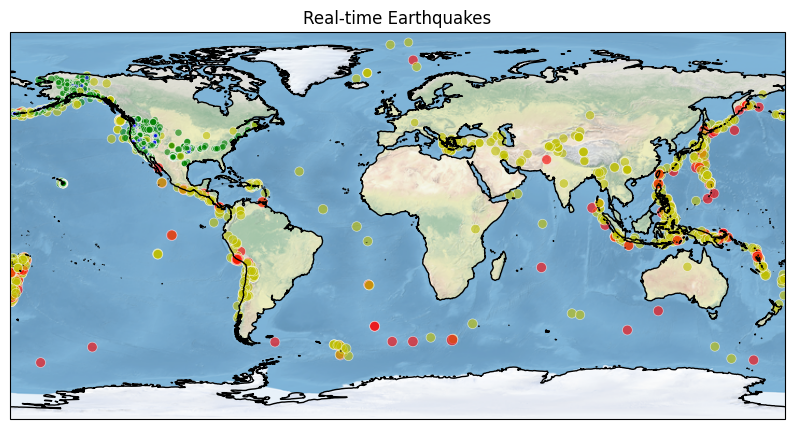

<Figure size 640x480 with 0 Axes>

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import time
from IPython.display import clear_output, display

# Function to get color based on magnitude
def get_color(magnitude):
    if magnitude < 1:
        return 'blue'
    elif magnitude < 3:
        return 'green'
    elif magnitude < 5:
        return 'y'
    else:
        return 'red'

# Function to fetch and plot data
def fetch_and_plot():
    # URL to the CSV file
    url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"

    # Read the CSV file
    df = pd.read_csv(url)

    # Filter relevant columns
    df = df[['latitude', 'longitude', 'mag']]

    # Drop rows with invalid magnitudes
    df = df.dropna(subset=['mag'])
    df = df[df['mag'] >= 0]

    # Get latitudes, longitudes, and magnitudes
    lons = df['longitude'].values
    lats = df['latitude'].values
    mag = df['mag'].values

    # Plotting
    plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines(resolution='50m')
    ax.stock_img()

    colors = np.array([get_color(m) for m in mag])
    sizes = mag * 10

    plt.scatter(lons, lats, s=sizes, c=colors, alpha=0.6, edgecolors='w', linewidth=0.5)

    plt.title('Real-time Earthquakes')
    plt.show()

while True:
    clear_output(wait=True)
    fetch_and_plot()
    display(plt.gcf())
    time.sleep(60)
